In [ ]:
from __future__ import print_function
import time
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer, Normalizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, Dropout, Input
import tensorflow as tf
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV
from scipy import interp

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import cross_validate

import nltk
from nltk.cluster import KMeansClusterer
from sklearn import cluster, metrics
nltk.download('punkt')
nltk.download('stopwords')

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import math
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv

from matplotlib import rc
from matplotlib import font_manager as fm, rcParams 
import matplotlib.pyplot as plt 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
!pip install -U -q PyDrive
from oauth2client.client import GoogleCredentials
import warnings
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
!pip install dataframe_image
import dataframe_image as dfi
#DL Models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
from sklearn.model_selection import cross_validate


import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelBinarizer
warnings.filterwarnings('ignore')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

#LatX fonts
import matplotlib.pyplot as plt
import seaborn as sns
#LatX fonts
from matplotlib import rc
from matplotlib import font_manager as fm, rcParams 
import matplotlib.pyplot as plt 

!pip install shap
import shap

plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def build_df(file_id, file_name, index_col=None):
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.GetContentFile(file_name)
  if index_col is not None :
    return pd.read_csv(file_name, index_col=index_col)
  return pd.read_csv(file_name)

df = build_df('1LEbg13-KBZzHmIWAv9SnthGUzjvcbJuA','stylo-data.csv')
news_df = build_df('15zZXsks6cI0FY4vpL555lBQSBr1QyjT4', 'news-data.csv' )
varela_df = build_df('1JoC7GlAmdQO9WPZeJZKMbv4djyQzeezC',  'varela-stylo-data.csv')
varela_df.pop('Subject')

0       ASSUNTOS VARIADOS
1       ASSUNTOS VARIADOS
2       ASSUNTOS VARIADOS
3       ASSUNTOS VARIADOS
4       ASSUNTOS VARIADOS
              ...        
2995              TURISMO
2996              TURISMO
2997              TURISMO
2998              TURISMO
2999              TURISMO
Name: Subject, Length: 3000, dtype: object

In [ ]:
#Some clean-up on line breaks
def clean_df(df):
  df = df.replace(to_replace ='\r', value = ' ', regex = True) 
  df = df.replace(to_replace ='\n ', value = '\n', regex = True) 
  df = df.replace(to_replace ='\n', value = ' ', regex = True)
  df = df.replace(to_replace ='\n{2,*}', value = ' ', regex = True)
  return df

#Read textual datasets
raw_df_test = build_df('1B-Ozck3R_cMeREw3yQQcODcz8UZ8Hvp7', 'raw_data.csv')
raw_df = clean_df(build_df('1B-Ozck3R_cMeREw3yQQcODcz8UZ8Hvp7', 'raw_data.csv'))
raw_news_df = clean_df(build_df('1P0UF5IRI3VNUuAulldEn84ntVfFLGiIq', 'raw_news_data.csv'))
raw_varela_df = clean_df(build_df('1s-qn2puLikOtN1YGOX2WZfZrNMxA6K4e', 'raw_varela_data.csv'))

stylo_scores_df = build_df('1g4zAbrxtVSqJ1GwwXKJufqMHXpWSrLsC', 'stylo_scores.csv', index_col=0)
tfidf_scores_df = build_df('12RMTasYFx6WAi-OByHaTFI0_wRRTQytX', 'idf_scores.csv', index_col=0)

raw_news_df.pop('Link')
raw_varela_df.pop('Subject')


def remove_varela_authors(df):
  regex_baleia = 'baleia - \d{1,2}\/\d{1,2}\/\d{2,4}'
  regex_ana = 'ana cristina cavalcante\s*\d{1,2} \w{1,4} \d{2,4} - \S{3,5}(min)*'
  regex_adriano = 'adriano gambarini - \d{1,2}\/\d{1,2}\/\d{2,4}'
  regex_ivolnildo = 'ivon(i)*l(d)*o lavôr(\s)*\d{1,2} \w{1,4} \d{2,4} - \S{4,5}(min)*'
  regex_mario = 'mário pinto(\s)*\d{1,2} \w{1,4} \d{2,4} - \S{4,5}(min)*'
  regex_julio = "mais sobr julio preuss - \d{1,2}\/\d{1,2}\/\d{2,4}(julio preussescreveu o livro 'fotografia digital: da compra da câmera à impressão das fotos)*"
  regex_roberto = 'roberto linsker - \d{1,2}\/\d{1,2}\/\d{2,4}'
  df['Text'] = df['Text'].str.replace(regex_baleia, ' ')
  df['Text'] = df['Text'].str.replace(regex_ana, ' ')
  df['Text'] = df['Text'].str.replace(regex_adriano, ' ')
  df['Text'] = df['Text'].str.replace(regex_ivolnildo, ' ')
  df['Text'] = df['Text'].str.replace(regex_mario, ' ')
  df['Text'] = df['Text'].str.replace(regex_julio, ' ')
  df['Text'] = df['Text'].str.replace(regex_roberto, ' ')
  return df

raw_varela_df = remove_varela_authors(raw_varela_df)


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('portuguese'))

raw_varela_df['Text2'] = raw_varela_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
raw_varela_df.drop(columns='Text', inplace=True)
raw_varela_df.rename(columns={'Text2' : 'Text'}, inplace=True)

In [ ]:
raw_varela_df

,Author,Text2
0,FOIRA,"solicitações escrever sobre h1n1, influenza a,..."
1,FOIRA,chamado 'pensar global agir local' grande impa...
2,FOIRA,"'escutem, negro chamado barack obama, disputan..."
3,FOIRA,"pense pessoa sorte! patriarca sarney. ô, bicho..."
4,FOIRA,corre mundo esplendorosa beleza musicalidade d...
...,...,...
2995,RBEIA,hoje fazer quarto backup nove mil imagens prod...
2996,RBEIA,alguns trabalhos colocam situações quais abalo...
2997,RBEIA,faz cinco dias escondo quarto hotel. saio foto...
2998,RBEIA,três dias viajando companhia editor revista na...


In [ ]:
# Remove few class entries (We need at least 3 samples of an author) and encode Author column 

def remove_entries(df, size):
  return df.groupby('Author').filter(lambda x: len(x) > size)

def encode_target_column(df, column):
  le = LabelEncoder()
  y = df.pop(column)
  encoded_Y = le.fit_transform(y)
  return encoded_Y

df = remove_entries(df, 2)
raw_df = remove_entries(raw_df, 2)

encoded_Y = encode_target_column(df, 'Author')
encoded_raw_Y  = encode_target_column(raw_df, 'Author')

encoded_Y_news  = encode_target_column(news_df, 'Author')
raw_news_df.pop('Author')

varela_Y_backup = varela_df['Author']
encoded_varela_Y = encode_target_column(varela_df, 'Author')
raw_varela_df.pop('Author')


corpus = raw_df['Text']
corpus_news = raw_news_df['Text']
corpus_varela = raw_varela_df['Text']

In [ ]:
# Prepare our training and test sets
X_varela, X_varela_test, Y_varela, Y_varela_test = train_test_split(varela_df, encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)
X_news, X_news_test, Y_news, Y_news_test = train_test_split(news_df, encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_student, X_student_test, Y_student, Y_student_test = train_test_split(df, encoded_Y, random_state=7, test_size=0.3, stratify=encoded_Y)

X_student_idf , X_student_idf_test, Y_student_idf, Y_student_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_df['Text']), encoded_Y, random_state=7, test_size=0.25, stratify=encoded_Y)
X_news_idf , X_news_idf_test, Y_news_idf, Y_news_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_news_df['Text']), encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_varela_idf , X_varela_idf_test, Y_varela_idf, Y_varela_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_varela_df['Text']), encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)

# df['Author'] = encoded_Y
# news_df['Author'] = encoded_Y_news
# varela_df['Author'] = encoded_varela_Y

In [ ]:

model_names = ['RL', 'NB Gaus', 'Random Forest','Árvores Extra','MLP']
scaling_names = ['ns', 'ss', 'mm', 'pt']

def build_metrics_df(model_names, metrics, scales):
  rows = pd.Series(model_names)
  cols = pd.Series(metrics)
  idx = pd.MultiIndex.from_product([rows, scales])
  return pd.DataFrame(index=idx, columns=cols)

test = build_metrics_df(model_names, metrics, scaling_names)

In [ ]:
stylo_data = [
   [X_student, X_student_test, Y_student, Y_student_test],
   [X_news, X_news_test, Y_news, Y_news_test], 
   [X_varela, X_varela_test, Y_varela, Y_varela_test] ]

tfidf_data = [
   [X_student_idf.toarray(), X_student_idf_test.toarray(), Y_student_idf, Y_student_idf_test],
   [X_news_idf.toarray(), X_news_idf_test.toarray(), Y_news_idf, Y_news_idf_test], 
   [X_varela_idf.toarray(), X_varela_idf_test.toarray(), Y_varela_idf, Y_varela_idf_test] ]

In [ ]:
models = [LogisticRegression(random_state=0), GaussianNB(), 
          RandomForestClassifier(random_state=0), ExtraTreesClassifier(random_state=0), 
          MLPClassifier(random_state=0)]

scalers = [StandardScaler(), StandardScaler(), MinMaxScaler(), PowerTransformer()]
metrics = ['acurácia', 'roc auc']

def set_scores(df, model_name, scale, acc, auc):
  df.loc[model_name, scale]['acurácia'] = acc
  df.loc[model_name, scale]['roc auc'] = auc


def scaling(scaler, data):
  return [scaler.fit_transform(X) for X in data]


def run_classic_models(data):
  student_stylo_acc_df = build_metrics_df(model_names, metrics, scaling_names)
  news_stylo_acc_df = student_stylo_acc_df.copy()
  varela_stylo_acc_df = student_stylo_acc_df.copy()
  for idx, scaler in enumerate(scalers):
    print(scaling_names[idx])
    if scaling_names[idx] != 'ns':
      scaled_data = scaling(scaler, [data[0][0], data[0][1], data[1][0], data[1][1], data[2][0], data[2][1]])
    else:
      print('no scaling')
      scaled_data = [data[0][0], data[0][1], data[1][0], data[1][1], data[2][0], data[2][1]]

    for model, model_name in zip(models, model_names):
      auc, acc = train_and_report(model, scaled_data[0], scaled_data[1], data[0][2], data[0][3], 'Base de estudantes', average="macro", verbose=False)
      set_scores(student_stylo_acc_df, model_name, scaling_names[idx], acc, auc)
      
      auc, acc = train_and_report(model, scaled_data[2], scaled_data[3], data[1][2], data[1][3], 'Base de notícias', average="macro", verbose=False)
      set_scores(news_stylo_acc_df, model_name, scaling_names[idx], acc, auc)
        
      auc, acc = train_and_report(model, scaled_data[4], scaled_data[5], data[2][2], data[2][3], 'Base Varela', average="macro", verbose=False )
      set_scores(varela_stylo_acc_df, model_name, scaling_names[idx], acc, auc)

  return student_stylo_acc_df, news_stylo_acc_df, varela_stylo_acc_df  


In [ ]:
deep_model_names = ['NN']
metrics = ['acurácia', 'roc auc macro', 'roc auc mic']  

def set_deep_scores(df, model_name, scale, acc, roc_auc_mac, roc_auc_mic):
  df.loc[model_name, scale]['acurácia'] = acc
  df.loc[model_name, scale]['roc auc macro'] = roc_auc_mac
  df.loc[model_name, scale]['roc auc mic'] = roc_auc_mic

def build_and_train(X, X_test, Y,  Y_test, input_size, epochs=300):
  nn = build_nn(input_size, len(set(Y)))
  print('nn built')
  hist = train_nn(nn, X, X_test, Y,  Y_test, epochs)
  print('nn trained')
  print('train accuracy{}'.format(hist.history['accuracy'][-1]))
  return hist

def split_build_and_train(df, y, input_size, epochs=300):
  X, X_test, Y, Y_test = train_test_split(df, y, random_state=0, test_size=0.3, stratify=y)
  return build_and_train(X, X_test, Y, Y_test, input_size, epochs)

def build_large_nn(input_size, num_of_classes):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(160, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_small_nn(input_size, num_of_classes):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(64, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation='selu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_nn(model, X, X_test, Y, Y_test, epochs=300): 
  Y_cat = tf.keras.utils.to_categorical(Y, num_classes=len(set(Y)))
  Y_cat_test = tf.keras.utils.to_categorical(Y_test, num_classes=len(set(Y)))
  return model.fit(X, Y_cat, validation_data=(X_test, Y_cat_test), epochs=epochs, verbose=0)

def build_lstm():
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])
    return model

def build_small_nn_full(input_size, num_of_classes, initializer, dropout, op_fun, optimizer):
  print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
  model = Sequential()
  model.add(Dense(64, input_dim=input_size, kernel_initializer=initializer , activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(16, activation='selu'))
  model.add(Dense(num_of_classes, activation=op_fun))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


def build_large_nn_full(input_size, num_of_classes, initializer, dropout, op_fun, optimizer):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(160, input_dim=input_size, kernel_initializer=initializer ,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_of_classes, activation=op_fun))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def binarize_split_scale(X, Y, scaler, scaler_name):
    #lb = LabelBinarizer() 
    #y = lb.fit_transform(Y)
    print(y.shape)#(84, 16)
    n_classes = y.shape[1]      
    #X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.3)
    X_train, X_test, Y_train, Y_test = train_test_split(X, to_categorical(Y), test_size=0.3)

    if scaler_name != 'ns':
      X_train = PowerTransformer().fit_transform(X_train)
      X_test = PowerTransformer().fit_transform(X_test)
      scaled_data = scaling(scaler, [X_train, X_test])
    else:
      print('no scaling')
      scaled_data = [X_train, X_test]
    
    return scaled_data, Y_train, Y_test, n_classes
    

def roc_auc_multiclass_nn(X_train, X_test, Y_train, Y_test, n_classes, epochs, columns=True, roc=True):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    acc = 0
    roc_auc = dict()
  
    nn_input_size = X_train.shape[1]
    if columns:
      estimator = build_small_nn(nn_input_size, n_classes)
    else:
      estimator = build_large_nn(nn_input_size, n_classes)
      
    estimator = KerasClassifier(build_fn=build_large_nn, nn_input_size=nn_input_size, n_classes=len(set(Y)),  epochs=200, batch_size=128)
    hist = estimator.fit(X_train, Y_train, verbose=0, epochs=epochs)

    print('finished training')
    y_pred_keras = estimator.predict(X_test)
    

    if roc:
      for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_keras[:, i])
        
        if (np.isnan(sum(tpr[i]))):
          tpr[i] = [0.5] * len(tpr[i])

        if (np.isnan(sum(fpr[i]))):
          fpr[i] = [0.5] * len(fpr[i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_pred_keras.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

      # Compute macro-average ROC curve and ROC area
      # First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

      # Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in range(n_classes):
          mean_tpr += interp(all_fpr, fpr[i], tpr[i])

      # Finally average it and compute AUC
      mean_tpr /= n_classes

      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
      print(roc_auc)
    return roc_auc, tpr, fpr, hist, acc

def run_deep_models(data, cols=True):
  student_stylo_acc_df = build_metrics_df(deep_model_names, metrics, scaling_names)
  news_stylo_acc_df = student_stylo_acc_df.copy()
  varela_stylo_acc_df = student_stylo_acc_df.copy()

  for idx, scaler in enumerate(scalers):
    print(scaling_names[idx])

    scaled_data, Y, Y_test, n_classes = binarize_split_scale(data[0][0], data[0][1], scaler , scaling_names[idx])
    roc, _, _, hist_s = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, cols)
    set_deep_scores(student_stylo_acc_df, 'NN', scaling_names[idx], hist_s.history['val_accuracy'][-1], roc["macro"], roc["micro"])

    scaled_data, Y, Y_test, n_classes = binarize_split_scale(data[1][0], data[1][1], scaler, scaling_names[idx])
    roc, _, _, hist_n = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, cols)
    set_deep_scores(news_stylo_acc_df, 'NN', scaling_names[idx], hist_n.history['val_accuracy'][-1], roc["macro"], roc["micro"])

    scaled_data, Y, Y_test, n_classes = binarize_split_scale(data[2][0], data[2][1], scaler , scaling_names[idx])
    roc, _, _, hist_v = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, cols)
    set_deep_scores(varela_stylo_acc_df, 'NN', scaling_names[idx], hist_v.history['val_accuracy'][-1], roc["macro"], roc["micro"])


  return student_stylo_acc_df, news_stylo_acc_df, varela_stylo_acc_df, hist_s, hist_n, hist_v

nn_stylo_data = [
           [df, encoded_Y],
           [news_df, encoded_Y_news],
           [varela_df, encoded_varela_Y]
]

nn_tfidf_data = [
   [TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y],
   [TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news], 
   [TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y]
]

#std, news, var, hs, hn, hv = run_deep_models(nn_stylo_data, True)
#std_idf, news_idf, var_idf, hs_idf, hn_idf, hv_idf = run_deep_models(nn_tfidf_data, False)

In [ ]:

scaled_data, Y, Y_test, n_classes = binarize_split_scale(TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, PowerTransformer(), 'pt')
roc, _, _, hist_n = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200,  True)
print(hist_n.history['val_accuracy'][-1])


In [ ]:
roc, _, _, hist_v = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, True)

input size:11135, num of classes:10
finished training
{0: 1.0, 'micro': 0.9101234567901235, 1: 0.7530864197530864, 2: 0.846153846153846, 3: 1.0, 4: 0.8480000000000001, 5: 1.0, 6: 1.0, 7: 0.8641975308641975, 8: 0.9680000000000001, 9: 1.0, 'macro': 0.9363792972459639}


In [ ]:
hist_v.history['val_accuracy']

In [ ]:
news_x = PowerTransformer().fit_transform(TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray())

In [ ]:
news_x.shape[1]

11135

In [ ]:
roc, _, _, hist_n = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, True)

input size:11135, num of classes:10
finished training
{0: 1.0, 'micro': 0.9645679012345678, 1: 0.8395061728395061, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.9753086419753088, 8: 1.0, 9: 1.0, 'macro': 0.987037037037037}


In [ ]:
hist_n.history['val_accuracy']

In [ ]:

model_keras = KerasClassifier(
      build_fn = build_large_nn,
      input_size = news_x.shape[1],
      num_of_classes = len(set(encoded_Y_news)),
      epochs=200, verbose=1)

cv_res = cross_validate(model_keras, news_x, to_categorical(encoded_Y_news), cv=3, return_train_score=False)


In [ ]:
cv_res['test_score']

array([0.05882353, 0.21212122, 0.06060606])

In [ ]:
hist_v.history['val_accuracy']

In [ ]:
hist_n.history['val_accuracy']

In [ ]:
std.merge(news, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var, left_index=True, right_index=True).to_csv('nn-stylo-scaled.csv')

In [ ]:
std_idf.merge(news_idf, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var_idf, left_index=True, right_index=True).to_csv('nn-idf-scaled.csv')

In [ ]:
student_df, news_df, varela_df = run_classic_models(tfidf_data)

In [ ]:
student_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_df, left_index=True, right_index=True).to_csv('scaled-stylo-score.csv')

In [ ]:
student_idf_df, news_idf_df, varela_idf_df = run_classic_models(tfidf_data)

In [ ]:
student_idf_df.merge(news_idf_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_idf_df, left_index=True, right_index=True)

In [ ]:
student_idf_df.merge(news_idf_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_idf_df, left_index=True, right_index=True).to_csv('scaled-idf-score.csv')

In [ ]:
scaled_df.to_latex()

In [ ]:
def merge_and_build_acc_df(students_df, news_df, varela_df):
    merged_df = students_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_df, left_index=True, right_index=True)
    return build_acc_df(merged_df)

def merge_and_build_auc_df(students_df, news_df, varela_df):
    merged_df = students_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_df, left_index=True, right_index=True)
    return build_auc_df(merged_df)

def build_acc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='roc auc_estudantes', inplace=True)
    merged_df.drop(columns='roc auc_notícias', inplace=True)
    merged_df.drop(columns='roc auc', inplace=True)
    merged_df.rename(columns={'acurácia_estudantes': 'Estudantes', 'acurácia_notícias' : 'Notícias', 'acurácia':'Varela'}, inplace=True)
    return merged_df

def build_auc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='acurácia_estudantes', inplace=True)
    merged_df.drop(columns='acurácia_notícias', inplace=True)
    merged_df.drop(columns='acurácia', inplace=True)
    merged_df.rename(columns={'roc auc_estudantes': 'Estudantes', 'roc auc_notícias' : 'Notícias', 'roc auc':'Varela'}, inplace=True)
    return merged_df


In [ ]:
merged_df = student_acc.merge(news_acc, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_acc, left_index=True, right_index=True)
merged_df.drop(columns='roc auc_estudantes', inplace=True)
merged_df.drop(columns='roc auc_notícias', inplace=True)
merged_df.drop(columns='roc auc', inplace=True)
merged_df.rename(columns={'acurácia_estudantes': 'Estudantes', 'acurácia_notícias' : 'Notícias', 'acurácia':'Varela'}, inplace=True)

merged_df

In [ ]:

stylo_scores_df = build_df('1_mnFalKzNJcZNnBnttON3HHoNTv6s4lS', 'stylo_scores.csv', index_col=0)
tfidf_scores_df = build_df('12RMTasYFx6WAi-OByHaTFI0_wRRTQytX', 'idf_scores.csv', index_col=0)

stylo_scores_scaled_df = build_df('1W-WCQ1ATEQErG2Mv3Vs3wEVCXJtdo42m', 'stylo_scores.csv', index_col=[0,1])
tfidf_scores_scaled_df = build_df('1hH5i3Gk5_Z_FztWmSk4G4M20_nY37gz8', 'idf_scores.csv', index_col=[0,1])

nn_stylo_scaled_df = build_df('1z5nQ5HrvB27AnV8mH7tBDf4RaeBek3n3', 'nn_stylo_scores.csv', index_col=[0,1])
nn_idf_scaled_df = build_df('1S2S31meoaQeJbWlU2OHmLhlLGZZaqaKL', 'nn_stylo_scores.csv', index_col=[0,1])

In [ ]:
nn_stylo_scaled_df.rename(columns={'roc auc mic_estudantes': 'roc auc_estudantes', 
                                   'roc auc mic_notícias': 'roc auc_notícias', 
                                   'roc auc mic': 'roc auc'}, inplace=True)

nn_idf_scaled_df.rename(columns={'roc auc mic_estudantes': 'roc auc_estudantes', 
                                   'roc auc mic_notícias': 'roc auc notícias', 
                                   'roc auc mic': 'roc auc'}, inplace=True)

In [ ]:
stylo_scores_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)
tfidf_scores_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)

In [ ]:
model = build_small_nn(74,16,kernel_initializer[0],dropouts[0], op_activation_functions[0], optimizer=optimizer[0])
model.fit(df.values, to_categorical(encoded_Y), epochs=epochs[0])  

In [ ]:
TfidfVectorizer().fit_transform(raw_df['Text']).shape[1]

5392

In [ ]:
best_models_rt_exp3 = optimize([TfidfVectorizer().fit_transform(raw_df['Text']),
              TfidfVectorizer().fit_transform(raw_news_df['Text']), 
              TfidfVectorizer().fit_transform(raw_varela_df['Text'])],
              [encoded_Y, encoded_Y_news, encoded_varela_Y],
              [LogisticRegression(random_state=0)],
              [build_lr_params()], 
              scaler=MinMaxScaler())

In [ ]:
tune_large_network(TfidfVectorizer().fit_transform(raw_df['Text']).toarray(), encoded_Y, nn_params,'student') 

In [ ]:
best_news = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, nn_params,'news')

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold

best_varela = tune_large_network(TfidfVectorizer().fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')

input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100


In [ ]:
tune_small_network(df, encoded_Y, nn_params, 'student')

In [ ]:
tune_small_network(news_df, encoded_Y_news, nn_params, 'news')

In [ ]:
tune_small_network(varela_df, encoded_varela_Y, nn_params, 'Varela')

In [ ]:
re_gnb_scores = {
    'student': [0.17857143, 0.14285714, 0.14285714],
    'news': [0.64705882, 0.84848485, 0.6969697 ],
    'varela': [0.524, 0.55,  0.518]
}

#params
#'var_smoothing': 1e-10
#'var_smoothing': 1e-08
#'var_smoothing': 1e-10

re_rf_scoores = {
    'student':[0.17857143, 0.03571429, 0.28571429],
    'news':[0.79411765, 0.75757576, 0.87878788]
    'varela': [0.567, 0.582, 0.557]
}

#params
#{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}

rt_rf_scores = {
    'student':[],
    'news':[],
    'varela':[]
}

#params
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}


In [ ]:
model_keras = KerasClassifier(
    build_fn = build_small_nn,
    input_size = input_size,
    num_of_classes = op_size,
    initializer=initializer,
    dropouts=dropout,
    op_function=op_fun,
    optimizer=optimizer,
    epochs=100, batch_size=10, verbose=0
)

In [ ]:
cv_results = cross_validate(model_keras, df, to_categorical(encoded_Y), cv=3) 

In [ ]:
np.mean(cv_results['test_score'])

0.11904762436946233

In [ ]:
KerasClassifier(build_fn=build_nn, input_size=nn_input_size, num_of_classes=len(set(Y)),  epochs=200, batch_size=128)

model_keras = KerasClassifier(
    build_fn = build_small_nn,
    input_size = 74,
    num_of_classes = 16,
)

In [ ]:
X_varela, X_varela_test, Y_varela, Y_varela_test = train_test_split(varela_df, encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)
X_news, X_news_test, Y_news, Y_news_test = train_test_split(news_df, encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_student, X_student_test, Y_student, Y_student_test = train_test_split(df, encoded_Y, random_state=7, test_size=0.3, stratify=encoded_Y)

X_student_idf , X_student_idf_test, Y_student_idf, Y_student_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_df['Text']), encoded_Y, random_state=7, test_size=0.25, stratify=encoded_Y)
X_news_idf , X_news_idf_test, Y_news_idf, Y_news_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_news_df['Text']), encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_varela_idf , X_varela_idf_test, Y_varela_idf, Y_varela_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_varela_df['Text']), encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)


In [ ]:


re_gnb_scores = {
    'Estudantes': np.mean([0.17857143, 0.14285714, 0.14285714]),
    'Notícias': np.mean([0.64705882, 0.84848485, 0.6969697 ]),
    'Varela': np.mean([0.524, 0.55,  0.518])
}

#params
#'var_smoothing': 1e-10
#'var_smoothing': 1e-08
#'var_smoothing': 1e-10

re_rf_scores = {
    'Estudantes': np.mean([0.17857143, 0.03571429, 0.28571429]),
    'Notícias': np.mean([0.79411765, 0.75757576, 0.87878788]),
    'Varela': np.mean([0.567, 0.582, 0.557])
}

#params
#{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}


re_mlp_scores = {
    'Estudantes':np.mean([0.28571429, 0.14285714, 0.10714286]),
    'Notícias':np.mean([0.73529412 ,0.6969697  ,0.57575758]),
    'Varela':np.mean([0.313 ,0.349 ,0.314])
}

#params
#{'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'identity'}
#{'max_iter': 500, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (150,), 'alpha': 0.0001, 'activation': 'identity'}
#{'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (150,), 'alpha': 0.001, 'activation': 'logistic'}

re_et_scores = {
    'Estudantes':np.mean([0.42857143 , 0.32142857 ,0.42857143]),
    'Notícias':np.mean([0.91176471 ,0.96969697 ,0.93939394]),
    'Varela':np.mean([0.784 ,0.811 ,0.771])
}

#params
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}


re_lr_scores ={
    'Estudantes':np.mean([0.28571429 ,0.14285714, 0.35714286]),
    'Notícias':np.mean([0.73529412, 0.78787879, 0.60606061]),
    'Varela':np.mean([0.73  ,0.762 ,0.706])
}
#params
#{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 25, 'C': 5}
#{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 50, 'C': 2}
#{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}


rt_rf_scores = {
    'Estudantes':np.mean([0.21428571 ,0.28571429 ,0.28571429]),
    'Notícias':np.mean([0.82352941 ,0.87878788 ,0.72727273]),
    'Varela':np.mean([0.723, 0.733, 0.734])
}

#params
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}
#{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
#{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': False}


rt_mlp_scores = {
    'Estudantes':np.mean([0.25,       0.25,       0.21428571]),
    'Notícias':np.mean([0.85294118 ,0.96969697 , 0.81818182]),
    'Varela':np.mean([0.844, 0.841, 0.793])
}

#params
#{'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}
#{'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200,), 'alpha': 0.0001, 'activation': 'identity'}

rt_et_scores = {
    'Estudantes':np.mean([0.21428571, 0.21428571, 0.35714286]),
    'Notícias':np.mean([0.85294118 ,0.96969697 ,0.81818182]),
    'Varela':np.mean([0.726, 0.728, 0.728])
}

#params
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}
#{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

rt_gnb_scores = {
    'Estudantes':np.mean([0.03571429, 0.10714286, 0.17857143]),
    'Notícias':np.mean([0.67647059, 0.72727273, 0.57575758]),
    'Varela': np.mean([0.529 ,0.551 ,0.505])
}

#params
#rt_gnb = GaussianNB('var_smoothing': 1e-05)


rt_lr_scores = {
    'Estudantes':np.mean([0.14285714, 0.17857143, 0.21428571]),
    'Notícias':np.mean([0.70588235, 0.96969697 ,0.78787879]),
    'Varela': np.mean([0.776 ,0.785 ,0.769])
}

#params
#lr_rt_student = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})
#lr_rt_news = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})
#lr_rt_varela = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})



In [ ]:
def stratified_roc_auc(estimator, X, Y, scaler=None):
  kf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
  roc_auc = []
  for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    if scaler is not None:
      X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

    y_train, y_test = Y[train_index], Y[test_index]
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict_proba(X_test)    
    roc_auc.append(roc_auc_score(y_test, y_pred, multi_class='ovr'))
  return np.mean(roc_auc)

stratified_roc_auc(e2, news_df.values, encoded_Y_news, PowerTransformer())

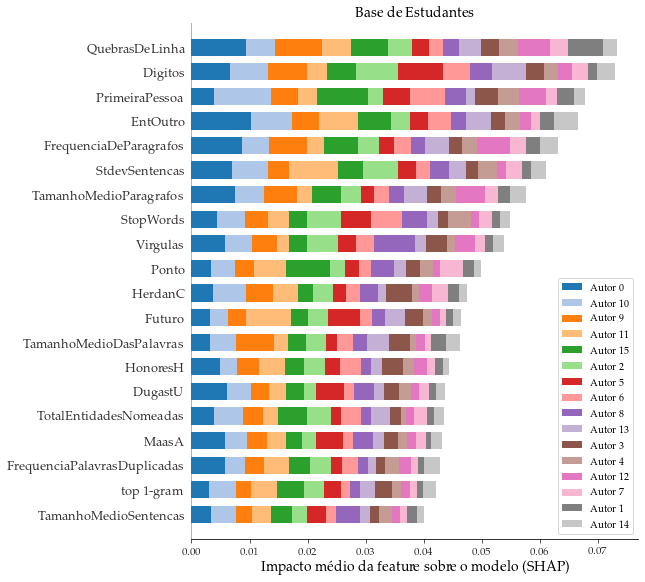

In [ ]:
# RE
import matplotlib.pyplot as plt
shap.initjs()
e1 = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)
e2 = ExtraTreesClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}, random_state=0)
#e3 = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)


def plot_shap(X, Y, estimator, colormap, title):
  cols = X.columns
  X = PowerTransformer().fit_transform(X)

  estimator.fit(X, Y)

  explainer = shap.TreeExplainer(estimator)
  shap_values = explainer.shap_values(X)

  shap_plt = shap.summary_plot(shap_values, X, feature_names=cols, show=False, max_display=20, color=colormap)
  f = plt.gcf()
  ax = plt.gca()
  ax.set_title(title, fontsize=14)
  ax.set_xlabel('Impacto médio da feature sobre o modelo (SHAP)', fontsize=14)
  #ax.invert_xaxis()

  leg = ax.legend()
  for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Autor'))


plot_shap(df, encoded_Y, e1, plt.get_cmap("tab20"), 'Base de Estudantes')
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)


#shap_values = shap.TreeExplainer(model).shap_values(X_train)
#shap.summary_plot(shap_values, X_train, plot_type="bar")

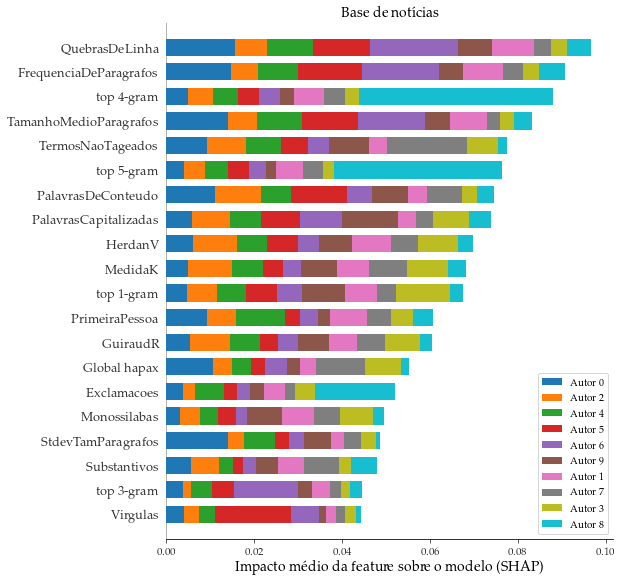

In [ ]:
plot_shap(news_df, encoded_Y_news, e2, plt.get_cmap("tab10"), 'Base de notícias')

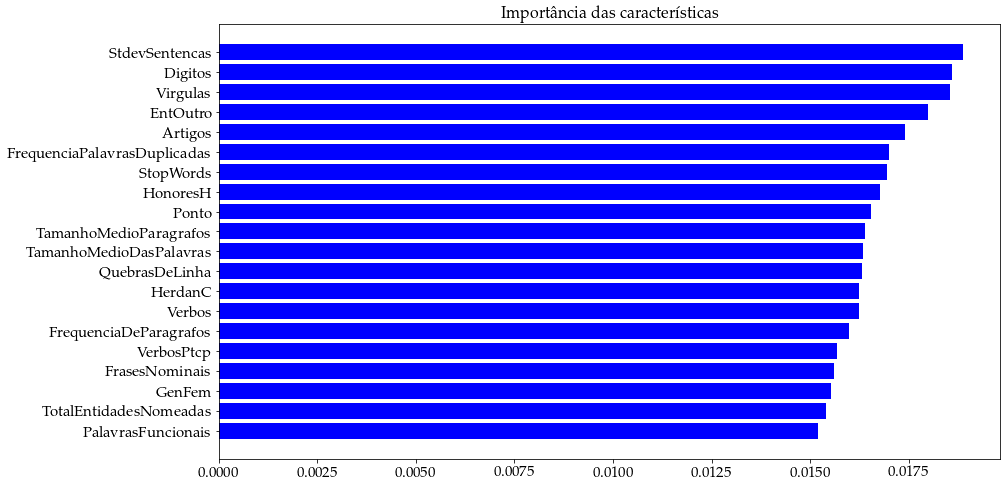

In [ ]:
#TODO: Continue from here - compare SelectKBest w/ SHAP values from above
X_train, X_test, Y_train, Y_test = train_test_split(df, encoded_Y, test_size=0.3, stratify=encoded_Y)
X_train = PowerTransformer().fit_transform(df.values)

e1 = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)



def plot_estimator_importances(X, Y, estimator, size):
  estimator.fit(X, Y)  
  importances = e1.feature_importances_
  std = np.std([tree.feature_importances_ for tree in e1.estimators_],axis=0)
  indices = np.argsort(importances)[::-1]
  best_n = indices[0:size]
  plt.figure(figsize=(14,8))
  plt.title("Importância das características", fontsize=16)
  #xerr=std[best_20]
  plt.barh(range(size), importances[best_n], color="b", align="center")
  plt.yticks(range(size), df.columns[best_n])
  plt.gca().invert_yaxis()
  plt.show()

plot_estimator_importances(df, encoded_Y, e1, 20)
  

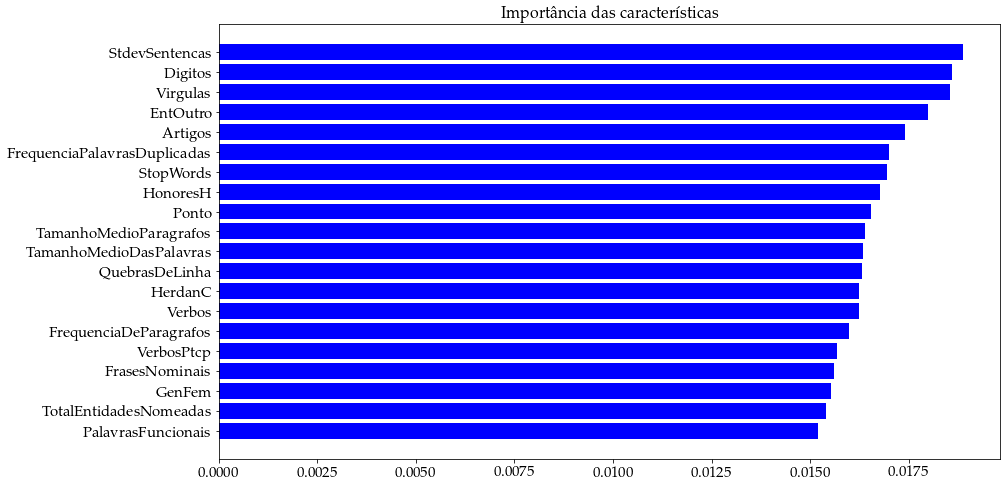

In [ ]:
e2 = ExtraTreesClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}, random_state=0)
plot_estimator_importances(news_df, encoded_Y_news, e2, 20)

In [ ]:
e3= MLPClassifier(**{'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.01, 'activation': 'relu'}, random_state=0)
#rt_mlp_scores['ROC AUC Varela'] = stratified_roc_auc(e3, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y)

vectorizer = TfidfVectorizer(binary=True)

X_train, X_test, Y_train, Y_test = train_test_split(raw_varela_df['Text'], encoded_varela_Y, test_size=0.3, stratify=encoded_varela_Y)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

e3.fit(X_train, Y_train)



MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
 TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray().shape

(3000, 68948)

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=68929, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

#lrate = 0.095
#decay = lrate/125

#beta_1float, default=0.9
#beta_2float, default=0.999
#epsilonfloat, default=1e-8
#alpha=0.01
#learning_rate=invscaling
#learning_rate_init=0.001

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), to_categorical(encoded_varela_Y), epochs=400, verbose=0)


In [ ]:
!pip install git+https://github.com/Zahlii/shap.git


from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb



model.save('sequential_mlp', save_format='h5')

In [ ]:
import keras
m2 = keras.models.load_model("sequential_mlp")

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

explainer = shap.DeepExplainer(model, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray())
#shap_values = explainer.shap_values(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray())



#explainer = shap.KernelExplainer(e3, X_train, feature_dependence="independent")
#shap_values = explainer.shap_values(X_test)
#X_test_array = X_test.toarray() 

In [ ]:
shap_values = explainer.shap_values(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray())

In [ ]:
print(varela_df.shape)
clf = ExtraTreesClassifier(n_estimators=150)
clf = clf.fit(varela_df, encoded_varela_Y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(varela_df)

In [ ]:
np.argsort(importances)

array([12, 14, 73, 72, 71, 35, 45, 46, 52, 64, 34, 67, 18, 28, 48, 43, 56,
       36, 39, 60, 32, 44, 25,  9, 51, 63, 47, 17, 31, 53, 26, 27, 40, 55,
       70, 13, 21,  8, 38,  2, 66, 24, 41,  5, 29, 62,  0, 50, 42, 61, 68,
       57, 22, 69, 30, 33, 58, 59,  1, 54, 10, 23, 19,  7, 37, 20,  6, 65,
        4, 11, 49, 16, 15,  3])

In [ ]:
df.columns[46]

'EntLocal'

In [ ]:
importances[13]

0.013523428781182881

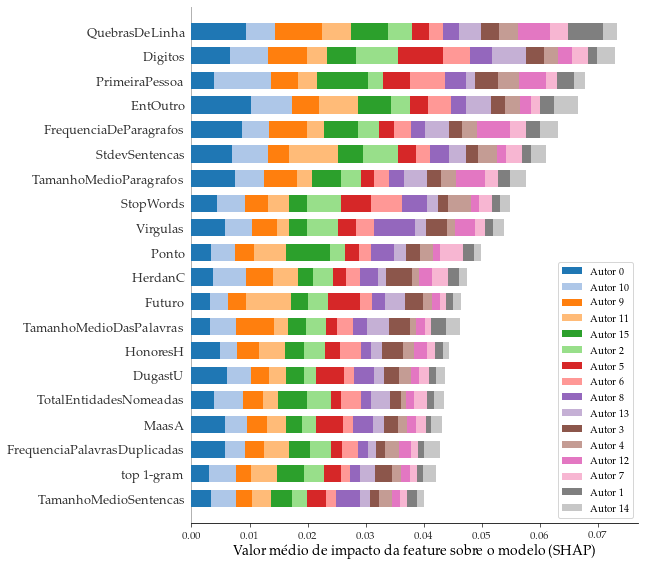

In [ ]:
plot_shap(df, encoded_Y, e1, plt.get_cmap("tab20"))

In [ ]:
def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return ListedColormap(initial_cm)

In [ ]:
import numpy as np
#RT optimized stratified cross val scores
rt_lr_scores = {'Estudantes': 0.17857142666666667,
 'Notícias': 0.8211527033333333,
 'ROC AUC Estudantes': 0.6644968987416904,
 'ROC AUC Notícias': 0.8817868619453712,
 'ROC AUC Varela': 0.794816835016835,
 'Varela': 0.7766666666666667}

rt_gnb_scores = {'Estudantes': 0.10714286,
 'Notícias': 0.6598336333333333,
 'ROC AUC Estudantes': 0.5326226035731244,
 'ROC AUC Notícias': 0.8701062909405511,
 'ROC AUC Varela': 0.7941077441077441,
 'Varela': 0.5283333333333333}

rt_et_scores = {'Estudantes': 0.26190476,
 'Notícias': 0.8802733233333333,
 'ROC AUC Estudantes': 0.5637366823955366,
 'ROC AUC Notícias': 0.976396716516294,
 'ROC AUC Varela': 0.889520202020202,
 'Varela': 0.7273333333333333}

rt_mlp_scores = {'Estudantes': 0.23809523666666665,
 'Notícias': 0.8802733233333333,
 'ROC AUC Estudantes': 0.6297841731956315,
 'ROC AUC Notícias': 0.8789860132657686,
 'ROC AUC Varela': 0.8946592592592592,
 'Varela': 0.8260000000000001}

rt_rf_scores = {'Estudantes': 0.26190476333333335,
 'Notícias': 0.80986334,
 'ROC AUC Estudantes': 0.6269190334164293,
 'ROC AUC Notícias': 0.947937523173897,
 'ROC AUC Varela': 0.847377104377105,
 'Varela': 0.73
}

rt_nn_scores = {'Estudantes': 0.23428572,
 'Notícias': 0.61006062,
 'ROC AUC Estudantes': 0.640906487416904,
 'ROC AUC Notícias': 0.9518685370576362,
 'ROC AUC Varela': 0.8110360269360269,
 'Varela': 0.58}

re_lr_scores = {'Estudantes': 0.26190476333333335,
 'Notícias': 0.7097445066666667,
 'ROC AUC Estudantes': 0.5526970560303894,
 'ROC AUC Notícias': 0.7884079017838752,
 'ROC AUC Varela': 0.8653999999999999,
 'Varela': 0.7326666666666667}

re_et_scores = {'Estudantes': 0.39285714333333327,
 'Notícias': 0.9402852066666667,
 'ROC AUC Estudantes': 0.5953723364791072,
 'ROC AUC Notícias': 0.9865498187286285,
 'ROC AUC Varela': 0.8700107744107743,
 'Varela': 0.7886666666666667}

re_mlp_scores = {'Estudantes': 0.17857143,
 'Notícias': 0.6693404666666667,
 'ROC AUC Estudantes': 0.6645365176875594,
 'ROC AUC Notícias': 0.7821642359823671,
 'ROC AUC Varela': 0.6756,
 'Varela': 0.3253333333333333}

re_rf_scores = {'Estudantes': 0.16666667,
 'Notícias': 0.8101604299999999,
 'ROC AUC Estudantes': 0.59741482668566,
 'ROC AUC Notícias': 0.8884312816709925,
 'ROC AUC Varela': 0.8673976430976431,
 'Varela': 0.5686666666666667}

re_gnb_scores = {'Estudantes': 0.15476190333333334,
 'Notícias': 0.7308377899999999,
 'ROC AUC Estudantes': 0.5547499703228871,
 'ROC AUC Notícias': 0.8603754171301446,
 'ROC AUC Varela': 0.7507974747474749,
 'Varela': 0.5306666666666667}

re_nn_scores = {'Estudantes': 0.13,
 'Notícias': 0.83,
 'ROC AUC Estudantes': 0.5726733885327634,
 'ROC AUC Notícias': 0.88,
 'ROC AUC Varela': 0.7616286195286196,
 'Varela': 0.5412}


In [ ]:
import pandas as pd
stylo_acc_scores = pd.DataFrame(data=[pd.Series(re_gnb_scores), pd.Series(re_rf_scores),pd.Series(re_et_scores), pd.Series(re_lr_scores), pd.Series(re_mlp_scores), pd.Series(re_nn_scores)], 
                                index=['NB Gaussiano', 'Random Forest', 'Árvores Extra', 'RL', 'MLP', 'RNA'])

In [ ]:
textual_acc_scores = pd.DataFrame(data=[pd.Series(rt_gnb_scores), pd.Series(rt_rf_scores),pd.Series(rt_et_scores), pd.Series(rt_lr_scores), pd.Series(rt_mlp_scores), pd.Series(rt_nn_scores)], 
                                index=['NB Gaussiano', 'Random Forest', 'Árvores Extra', 'RL', 'MLP','RNA'])

In [ ]:
stylo_acc_scores

,Estudantes,Notícias,ROC AUC Estudantes,ROC AUC Notícias,ROC AUC Varela,Varela
NB Gaussiano,0.154762,0.730838,0.554750,0.860375,0.750797,0.530667
Random Forest,0.166667,0.810160,0.597415,0.888431,0.867398,0.568667
Árvores Extra,0.392857,0.940285,0.595372,0.986550,0.870011,0.788667
RL,0.261905,0.709745,0.552697,0.788408,0.865400,0.732667
MLP,0.178571,0.669340,0.664537,0.782164,0.675600,0.325333
RNA,0.130952,0.040107,0.522673,0.476279,0.461629,0.059333


In [ ]:
textual_acc_scores

,Estudantes,Notícias,ROC AUC Estudantes,ROC AUC Notícias,ROC AUC Varela,Varela
NB Gaussiano,0.107143,0.659834,0.532623,0.870106,0.794108,0.528333
Random Forest,0.261905,0.809863,0.626919,0.947938,0.847377,0.730000
Árvores Extra,0.261905,0.880273,0.563737,0.976397,0.889520,0.727333
RL,0.178571,0.821153,0.664497,0.881787,0.794817,0.776667
MLP,0.238095,0.880273,0.629784,0.878986,0.894659,0.826000
RNA,0.154762,0.609626,0.630906,0.771869,0.731036,0.584333


In [ ]:
def plot_metrics(dfs, metrics, title):
  fig, axes = plt.subplots(nrows=1, ncols=len(dfs), figsize=(14, 8))

  plt.rc('xtick',labelsize=8)
  plt.rc('ytick',labelsize=8)
  fig.autofmt_xdate(rotation=45)
  fig.suptitle(title)
  for idx, ax in enumerate(axes):
    new_df = dfs[idx].copy()
    new_df['Modelo'] = new_df.index
    new_df.reset_index(drop=True, inplace=True)
    tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
    tidy.rename(inplace=True,columns={"Variable": "Base", "Value": metrics[idx]} )
    
    sns.barplot(x='Modelo', y=metrics[idx], hue='Base', data=tidy, ax=ax)

def plot_metrics_large(dfs, metrics, main_title, titles, legends, rotate=True, sharey=False):
  plt.rcParams['figure.dpi'] = 600
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10), sharey=sharey)
  fig.tight_layout(h_pad=5, w_pad=5)

  plt.rc('xtick',labelsize=12)
  plt.rc('ytick',labelsize=12)
  
  #fig.suptitle(main_title)
  for idx, ax in enumerate(axes.flat):
    ax.set_title(titles[idx])
    new_df = dfs[idx].copy()
    new_df['Modelo'] = new_df.index
    new_df.reset_index(drop=True, inplace=True)
    tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
    tidy.rename(inplace=True,columns={"Variable": "Base", "Value": metrics[idx]} )
    
    sns.barplot(x='Modelo', y=metrics[idx], hue='Base', data=tidy, ax=ax)

    if not legends[idx]:
      ax.legend([],[], frameon=False)
    
    if rotate:
      plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('')
    anotatte_bars(ax)

def anotatte_bars(ax):
  for p in ax.patches:
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax.annotate("{:.2f}".format(p.get_height()), (x, y), ha='center', fontsize=8)


def build_acc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='ROC AUC Estudantes', inplace=True)
    merged_df.drop(columns='ROC AUC Notícias', inplace=True)
    merged_df.drop(columns='ROC AUC Varela', inplace=True)
    return merged_df

def build_auc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='Estudantes', inplace=True)
    merged_df.drop(columns='Notícias', inplace=True)
    merged_df.drop(columns='Varela', inplace=True)
    merged_df.rename(columns={'ROC AUC Estudantes': 'Estudantes', 'ROC AUC Notícias' : 'Notícias', 'ROC AUC Varela':'Varela'}, inplace=True)
    return merged_df

#plot_metrics([build_acc_df(stylo_acc_scores, True), build_auc_df(stylo_acc_scores, True)], ['Acurácia', 'ROC AUC'], 'Representação Estilométrica')
plot_metrics_large([
                    
                    build_acc_df(textual_acc_scores, True),
                    build_acc_df(stylo_acc_scores, True),
                    build_auc_df(textual_acc_scores, True),
                    build_auc_df(stylo_acc_scores, True),
                    
              ]
              , ['Acurácia', 'Acurácia', 'ROC AUC', 'ROC AUC'], 
             'Atribuição de Autoria', ['TF-IDF', 'Estilométria', 'TF-IDF', 'Estilométria'], [True,True, False, False], rotate=True, sharey=True)